<a href="https://colab.research.google.com/github/Lizatol/Liza-Tolmacheva-1/blob/main/Tolmacheva_Elizaveta_Python_for_Urban_Studies_1_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practical Work #3: Provision metric


---


**Done by Tolmacheva Elizaveta**

# **Data for calculating provision: Vsevolozhsky District; Healthcare facilities**

In [ ]:
!pip install osmnx mapclassify

In [ ]:
!pip install descartes

In [ ]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt
import folium
import mapclassify
import osmnx

In [ ]:
murino = osmnx.geocoder.geocode_to_gdf("Мурино")

In [ ]:
murino

,geometry,bbox_west,bbox_south,bbox_east,bbox_north,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((30.41565 60.04671, 30.41888 60.04609...",30.415649,60.031814,30.500924,60.081305,156477403,relation,1657571,60.046193,30.44589,place,town,18,0.410586,town,Murino,"Murino, Муринское городское поселение, Vsevolo..."


In [ ]:
murino.explore()

<Axes: >

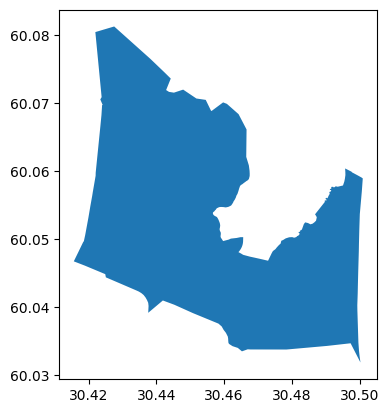

In [ ]:
murino.plot()

In [ ]:
murino.boundary

,0
0,"LINESTRING (30.41565 60.04671, 30.41888 60.046..."


In [ ]:
murino.boundary.explore()

In [ ]:
murino_polygon = murino.geometry

In [ ]:
murino_polygon.values

<GeometryArray>
[<POLYGON ((30.416 60.047, 30.419 60.046, 30.425 60.045, 30.425 60.044, 30.43...>]
Length: 1, dtype: geometry

In [ ]:
murino_buildings = osmnx.features.features_from_polygon(murino_polygon.values[0], tags={"building": ["apartments", "house", "residential", "detached", "dormitory"]})

In [ ]:
murino_buildings.shape

(315, 49)

In [ ]:
murino_buildings.geom_type.value_counts()

,count
Polygon,314
MultiPolygon,1


In [ ]:
murino_buildings.head()

geometry  \
element  id                                                           
relation 6794002  POLYGON ((30.43536 60.04851, 30.43521 60.04862...   
         7555906  POLYGON ((30.42118 60.05359, 30.42115 60.05354...   
         7563809  POLYGON ((30.42244 60.05394, 30.42248 60.054, ...   
         7603662  POLYGON ((30.42042 60.05236, 30.42065 60.05266...   
         8017898  POLYGON ((30.42942 60.05712, 30.42947 60.05719...   

                 addr:housenumber           addr:street    building  \
element  id                                                           
relation 6794002                4       Охтинская аллея  apartments   
         7555906                6  Воронцовский бульвар  apartments   
         7563809               13    бульвар Менделеева  apartments   
         7603662                4  Воронцовский бульвар  apartments   
         8017898             16/9        улица Шувалова  apartments   

                 building:cladding building:levels design:note  \
element  id                                                      
relation 6794002               NaN             NaN         NaN   
         7555906               NaN              23         NaN   
         7563809               NaN              19         NaN   
         7603662               NaN              23         NaN   
         8017898               NaN              18         NaN   

                 building:year_built design:ref design:year  ...  \
element  id                                                  ...   
relation 6794002                 NaN        NaN         NaN  ...   
         7555906                 NaN        NaN         NaN  ...   
         7563809                 NaN        NaN         NaN  ...   
         7603662                 NaN        NaN         NaN  ...   
         8017898                 NaN        NaN         NaN  ...   

                 opening_hours payment:cash payment:debit_cards preschool  \
element  id                                                                 
relation 6794002           NaN          NaN                 NaN       NaN   
         7555906           NaN          NaN                 NaN       NaN   
         7563809           NaN          NaN                 NaN       NaN   
         7603662           NaN          NaN                 NaN       NaN   
         8017898           NaN          NaN                 NaN       NaN   

                 website source:geometry check_date survey:date          type  \
element  id                                                                     
relation 6794002     NaN             NaN        NaN         NaN  multipolygon   
         7555906     NaN             NaN        NaN         NaN  multipolygon   
         7563809     NaN             NaN        NaN         NaN  multipolygon   
         7603662     NaN             NaN        NaN         NaN  multipolygon   
         8017898     NaN             NaN        NaN         NaN  multipolygon   

                 opening_date  
element  id                    
relation 6794002          NaN  
         7555906          NaN  
         7563809          NaN  
         7603662          NaN  
         8017898          NaN  

[5 rows x 49 columns]

In [ ]:
murino_buildings.explore()

In [ ]:
murino_healthcare = osmnx.features.features_from_polygon(murino_polygon.values[0], tags={"building":"hospital", "amenity": ["hospital", "clinic", "doctors", "doctor", "health_post", "centre"]})

In [ ]:
murino_healthcare.head()

geometry  amenity                   name  \
element id                                                                      
node    4220333237  POINT (30.46587 60.04701)   clinic  Муринская амбулатория   
        4495808284  POINT (30.44656 60.05219)  doctors                Инвитро   
        5317891122  POINT (30.44535 60.04931)   clinic              АльтерМед   
        5569915038  POINT (30.43116 60.05239)  doctors               Гемотест   
        5569915040  POINT (30.42954 60.05329)  doctors                Инвитро   

                                                        opening_hours  \
element id                                                              
node    4220333237                                  Mo-Fr 08:00-20:00   
        4495808284    Mo-Fr 07:30-20:00;Sa 08:30-17:00;Su 09:00-15:00   
        5317891122                                                NaN   
        5569915038                                        07:30-16:30   
        5569915040  Mo-Fr 07:30-20:00; Sa 08:30-16:00; Su 09:00-15:00   

                             phone     brand brand:wikidata  \
element id                                                    
node    4220333237  +7 81370 96375       NaN            NaN   
        4495808284             NaN   Инвитро       Q4200546   
        5317891122  +7 812 4688888       NaN            NaN   
        5569915038             NaN  Гемотест            NaN   
        5569915040             NaN   Инвитро       Q4200546   

                          brand:wikipedia       contact:email   contact:phone  \
element id                                                                      
node    4220333237                    NaN                 NaN             NaN   
        4495808284  ru:Инвитро (компания)     info@invitro.ru  +7 800 2003630   
        5317891122                    NaN                 NaN             NaN   
        5569915038                    NaN  client@gemotest.ru  +7 800 5501313   
        5569915040  ru:Инвитро (компания)     info@invitro.ru  +7 800 2003630   

                    ... medical_system level provided_for:adult  \
element id          ...                                           
node    4220333237  ...            NaN   NaN                NaN   
        4495808284  ...            NaN   NaN                NaN   
        5317891122  ...            NaN   NaN                NaN   
        5569915038  ...            NaN   NaN                NaN   
        5569915040  ...            NaN   NaN                NaN   

                   provided_for:senior provided_for:child provided_for:infant  \
element id                                                                      
node    4220333237                 NaN                NaN                 NaN   
        4495808284                 NaN                NaN                 NaN   
        5317891122                 NaN                NaN                 NaN   
        5569915038                 NaN                NaN                 NaN   
        5569915040                 NaN                NaN                 NaN   

                   provided_for:toddler addr:city building building:levels  
element id                                                                  
node    4220333237                  NaN       NaN      NaN             NaN  
        4495808284                  NaN       NaN      NaN             NaN  
        5317891122                  NaN       NaN      NaN             NaN  
        5569915038                  NaN       NaN      NaN             NaN  
        5569915040                  NaN       NaN      NaN             NaN  

[5 rows x 53 columns]

In [ ]:
murino_healthcare.shape

(22, 53)

In [ ]:
murino_healthcare.geom_type.value_counts()

,count
Point,21
Polygon,1


In [ ]:
murino_healthcare.explore()

In [ ]:
murino_roads = osmnx.features.features_from_polygon(murino_polygon.values[0], tags={"highway": ["primary", "secondary", "motorway", "tertiary", "residential", "pedestrian"]})

In [ ]:
murino_roads.head()

geometry  \
element id                                                            
way     4458331   LINESTRING (30.45242 60.04607, 30.45219 60.046...   
        8146330   LINESTRING (30.45787 60.05532, 30.45813 60.055...   
        8146515   LINESTRING (30.46424 60.04806, 30.46435 60.048...   
        9894645   LINESTRING (30.39971 60.05374, 30.40066 60.053...   
        15575094  LINESTRING (30.43608 60.0401, 30.43841 60.0403...   

                      highway source     maxspeed horse  lit foot lanes  \
element id                                                                
way     4458331     secondary    NaN           40   NaN  yes   no     4   
        8146330      tertiary    NaN     RU:urban   NaN  yes  NaN     2   
        8146515   residential    NaN     RU:urban   NaN   no  NaN     2   
        9894645      motorway    NaN  RU:motorway   NaN  yes  NaN     4   
        15575094      primary    NaN     RU:urban   NaN  yes   no     2   

                               name      ref  ... maxheight lanes:backward  \
element id                                    ...                            
way     4458331   Центральная улица  41К-065  ...       NaN            NaN   
        8146330     шоссе в Лаврики  41К-305  ...       NaN            NaN   
        8146515        Лесная улица      NaN  ...       NaN            NaN   
        9894645                 КАД    А-118  ...       NaN            NaN   
        15575094  Муринский тоннель      NaN  ...       NaN            NaN   

                 lanes:forward toll trolley_wire check_date priority_road  \
element id                                                                  
way     4458331            NaN  NaN          NaN        NaN           NaN   
        8146330            NaN  NaN          NaN        NaN           NaN   
        8146515            NaN  NaN          NaN        NaN           NaN   
        9894645            NaN  NaN          NaN        NaN           NaN   
        15575094           NaN  NaN          NaN        NaN           NaN   

                 postal_code bus_bay website  
element id                                    
way     4458331          NaN     NaN     NaN  
        8146330          NaN     NaN     NaN  
        8146515          NaN     NaN     NaN  
        9894645          NaN     NaN     NaN  
        15575094         NaN     NaN     NaN  

[5 rows x 60 columns]

In [ ]:
murino_roads.shape

(338, 60)

In [ ]:
murino_roads.geom_type.value_counts()

,count
LineString,332
Polygon,6


In [ ]:
murino_roads.explore()

In [ ]:
map = murino.boundary.explore(tiles="CartoDB positron")
murino_healthcare.explore(
    m=map,
    color="red",
)
murino_buildings.explore(
    m=map,
    color="green",
)
murino_roads.explore(
    m=map,
    color ="brown",
)
map

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon
ox.settings.log_console = True
ox.settings.use_cache = True
ox.__version__

'2.0.2'

In [ ]:
place = 'Мурино'
network_type = 'walk'
trip_times = [5, 10, 15, 20, 25] #in minutes
travel_speed = 4.5 #walking speed in km/hour

In [ ]:
G = ox.graph_from_place(place, network_type=network_type)

In [ ]:
gdf_nodes = ox.graph_to_gdfs(G, edges=False)
x, y = gdf_nodes['geometry'].unary_union.centroid.xy
center_node = ox.nearest_nodes(G, (y[0], x[0]))
G = ox.project_graph(G)

<ipython-input-172-4bb78bf39916>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  x, y = gdf_nodes['geometry'].unary_union.centroid.xy


TypeError: nearest_nodes() missing 1 required positional argument: 'Y'

<ipython-input-175-7e5f8de54a5f>:14: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


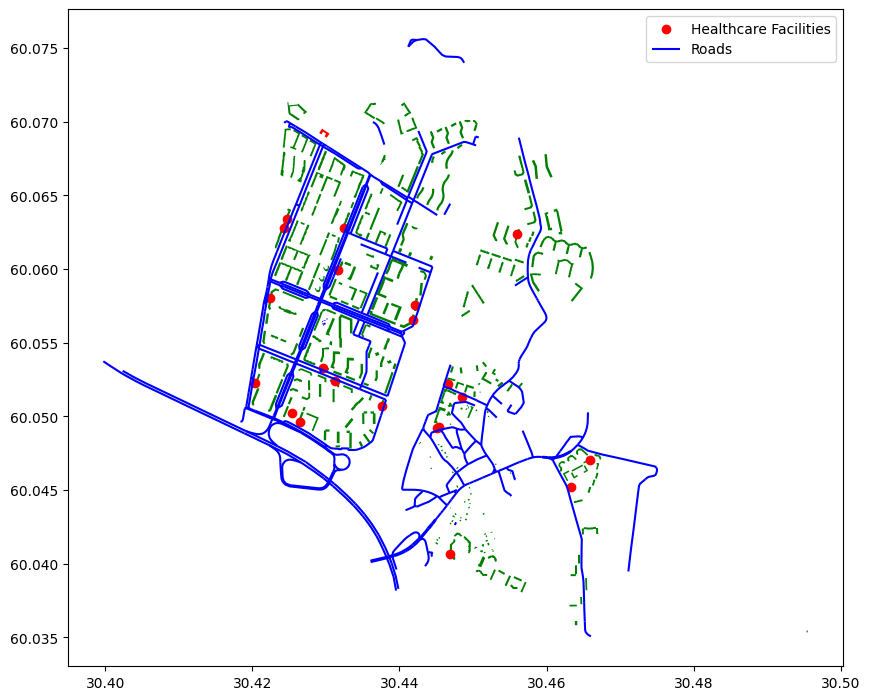

In [ ]:
# Plot the data layers
fig, ax = plt.subplots(figsize=(10, 10))
# Plot street network

# Plot buildings
murino_buildings.plot(ax=ax, color='g', label='Buildings')

# Plot healthcare facilities
murino_healthcare.plot(ax=ax, color='r', label='Healthcare Facilities')

murino_roads.plot(ax=ax, color='b', label='Roads')

# Legend and show
plt.legend()
plt.show()

In [ ]:
murino_healhcare = murino_healthcare.drop_duplicates("geometry")

In [ ]:
murino_buildings.geometry.duplicated(False).sum()

np.int64(0)

In [ ]:
murino_buildings = murino_buildings.drop_duplicates("geometry")

In [ ]:
murino_buildings.geom_type.value_counts()

,count
Polygon,314
MultiPolygon,1


In [ ]:
murino_buildings.shape

(315, 49)

In [ ]:
murino_buildings.index.get_level_values(1)

Index([   6794002,    7555906,    7563809,    7603662,    8017898,   12561734,
         12561745,   12561749,   12885125,   12886842,
       ...
        858974056,  858974057,  933362795, 1023437133, 1052798768, 1052798769,
       1052798770, 1156416417, 1168352678, 1312614058],
      dtype='int64', name='id', length=315)

In [ ]:
murino_buildings.index.get_level_values(1).duplicated().sum()

np.int64(0)

In [ ]:
murino_buildings = murino_buildings.set_index(murino_buildings.index.get_level_values(1))

In [ ]:
murino_buildings.head()

,geometry,addr:housenumber,addr:street,building,building:cladding,building:levels,design:note,building:year_built,design:ref,design:year,...,opening_hours,payment:cash,payment:debit_cards,preschool,website,source:geometry,check_date,survey:date,type,opening_date
id,,,,,,,,,,,,,,,,,,,,,
6794002,"POLYGON ((30.43536 60.04851, 30.43521 60.04862...",4,Охтинская аллея,apartments,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN
7555906,"POLYGON ((30.42118 60.05359, 30.42115 60.05354...",6,Воронцовский бульвар,apartments,NaN,23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN
7563809,"POLYGON ((30.42244 60.05394, 30.42248 60.054, ...",13,бульвар Менделеева,apartments,NaN,19,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN
7603662,"POLYGON ((30.42042 60.05236, 30.42065 60.05266...",4,Воронцовский бульвар,apartments,NaN,23,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN
8017898,"POLYGON ((30.42942 60.05712, 30.42947 60.05719...",16/9,улица Шувалова,apartments,NaN,18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN


In [ ]:
murino_buildings["building:levels"].isna().sum()

np.int64(25)

In [ ]:
gdf_filled = murino_buildings.copy()
gdf_filled = gdf_filled.to_crs(3857)

In [ ]:
gdf_filled.shape, murino_buildings.shape

((315, 49), (315, 49))

In [ ]:
missed_values = gdf_filled[gdf_filled['building:levels'].isna()]
filled_values = gdf_filled[gdf_filled['building:levels'].isna() == False]

In [ ]:
fill_missed = missed_values.sjoin_nearest(filled_values, how="left", distance_col="distance", max_distance=1000, exclusive=True)

In [ ]:
fill_missed.head()

,geometry,addr:housenumber_left,addr:street_left,building_left,building:cladding_left,building:levels_left,design:note_left,building:year_built_left,design:ref_left,design:year_left,...,payment:cash_right,payment:debit_cards_right,preschool_right,website_right,source:geometry_right,check_date_right,survey:date_right,type_right,opening_date_right,distance
id_left,,,,,,,,,,,,,,,,,,,,,
6794002,"POLYGON ((3388049.033 8410546.548, 3388031.834...",4,Охтинская аллея,apartments,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.551321
12885125,"POLYGON ((3390796.231 8413604.315, 3390801.486...",59 к1,шоссе в Лаврики,apartments,NaN,NaN,NaN,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,multipolygon,NaN,72.706681
143814321,"POLYGON ((3389417.306 8409383.002, 3389397.079...",41,Центральная улица,detached,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.559161
143814322,"POLYGON ((3389378.077 8409382.044, 3389407.242...",4,Школьная улица,detached,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.847837
186821908,"POLYGON ((3390253.582 8410032.963, 3390239.434...",NaN,NaN,detached,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,235.348424


In [ ]:
fill_missed[["geometry", "building:levels_left", "building:levels_right", "distance"]]

,geometry,building:levels_left,building:levels_right,distance
id_left,,,,
6794002,"POLYGON ((3388049.033 8410546.548, 3388031.834...",NaN,22,75.551321
12885125,"POLYGON ((3390796.231 8413604.315, 3390801.486...",NaN,18,72.706681
143814321,"POLYGON ((3389417.306 8409383.002, 3389397.079...",NaN,1,87.559161
143814322,"POLYGON ((3389378.077 8409382.044, 3389407.242...",NaN,1,43.847837
186821908,"POLYGON ((3390253.582 8410032.963, 3390239.434...",NaN,1,235.348424
186821925,"POLYGON ((3389342.699 8409487.557, 3389336.332...",NaN,1,173.138207
186942692,"POLYGON ((3389638.642 8409568.617, 3389644.141...",NaN,1,33.820253
187485965,"POLYGON ((3389911.943 8410888.942, 3389902.046...",NaN,3,38.115319
273308279,"POLYGON ((3389497.422 8411013.922, 3389524.217...",NaN,22,97.690401


In [ ]:
fill_missed["building:levels_right"].isna().sum()

np.int64(1)

In [ ]:
fill_missed["building:levels_right"].value_counts()

,count
building:levels_right,
1,7
4,4
18,3
22,2
3,1
23,1
14,1
17,1
25,1


In [ ]:
fill_missed["building:levels_right"].apply(type).value_counts()

,count
building:levels_right,
<class 'str'>,24
<class 'float'>,1


In [ ]:
fill_missed["building:levels_right"].isna().sum()

np.int64(1)

In [ ]:
import re

def extract_number(value):
  if pd.isna(value):
    return np.nan
  if isinstance(value, (int, float)):
    return float(value)
  if isinstance(value, str):
    # Find first number (including decimals and negative numbers)
    match = re.search(r'-?\d+\.?\d*', value)
    return float(match.group()) if match else np.nan
  return np.nan

In [ ]:
fill_missed["building:levels_right"] = fill_missed["building:levels_right"].apply(extract_number)

In [ ]:
fill_missed["building:levels_right"].apply(type).value_counts()

,count
building:levels_right,
<class 'float'>,25


In [ ]:
fill_missed["building:levels_right"].isna().sum()

np.int64(1)

In [ ]:
fill_missed["building:levels_right"].mean()

np.float64(9.833333333333334)

In [ ]:
fill_missed["building:levels_right"] = fill_missed["building:levels_right"].fillna(3).astype(int)

In [ ]:
fill_missed["building:levels_right"].isna().sum()

np.int64(0)

In [ ]:
fill_missed["building:levels_right"].apply(type).value_counts()

,count
building:levels_right,
<class 'int'>,25


In [ ]:
fill_missed["building:levels_right"]

,building:levels_right
id_left,
6794002,22
12885125,18
143814321,1
143814322,1
186821908,1
186821925,1
186942692,1
187485965,3
273308279,22


In [ ]:
fill_missed.geometry.duplicated().sum()

np.int64(0)

In [ ]:
common_records = gdf_filled.index.isin(fill_missed.drop_duplicates("geometry").index)
gdf_filled.loc[common_records, "building:levels"] = fill_missed.drop_duplicates("geometry")["building:levels_right"].values

In [ ]:
gdf_filled['building:levels'].isna().sum()

np.int64(0)

In [ ]:
murino_buildings.shape, gdf_filled.shape

((315, 49), (315, 49))

In [ ]:
murino_buildings_final = murino_buildings.loc[:, "geometry"].reset_index()

In [ ]:
murino_buildings_final["levels"] = gdf_filled['building:levels'].values

In [ ]:
murino_buildings_final = murino_buildings_final.to_crs(3857)

In [ ]:
murino_buildings_final

,id,geometry,levels
0,6794002,"POLYGON ((3388049.033 8410546.548, 3388031.834...",22
1,7555906,"POLYGON ((3386470.323 8411678.879, 3386466.76 ...",23
2,7563809,"POLYGON ((3386610.196 8411757.018, 3386615.35 ...",19
3,7603662,"POLYGON ((3386385.731 8411404.504, 3386411.457...",23
4,8017898,"POLYGON ((3387387.05 8412466.647, 3387393.295 ...",18
...,...,...,...
310,1052798769,"POLYGON ((3388696.211 8415186.841, 3388695.365...",12
311,1052798770,"POLYGON ((3388218.773 8415403.905, 3388220.81 ...",12
312,1156416417,"POLYGON ((3388639.327 8415634.25, 3388684.523 ...",12
313,1168352678,"POLYGON ((3388120.5 8415619.279, 3388153.551 8...",12


In [ ]:
murino_buildings_final["area"] = murino_buildings_final.area

In [ ]:
murino_buildings_final.head()

,id,geometry,levels,area
0,6794002,"POLYGON ((3388049.033 8410546.548, 3388031.834...",22,4995.963038
1,7555906,"POLYGON ((3386470.323 8411678.879, 3386466.76 ...",23,9105.375835
2,7563809,"POLYGON ((3386610.196 8411757.018, 3386615.35 ...",19,6596.019756
3,7603662,"POLYGON ((3386385.731 8411404.504, 3386411.457...",23,5526.786588
4,8017898,"POLYGON ((3387387.05 8412466.647, 3387393.295 ...",18,15747.605864


In [ ]:
murino_buildings_final["levels"].apply(type).value_counts()

,count
levels,
<class 'str'>,290
<class 'int'>,25


In [ ]:
murino_buildings_final["levels"].value_counts()

,count
levels,
18,37
19,32
16,26
17,21
1,18
22,16
2,16
24,15
15,11


In [ ]:
murino_buildings_final["levels"] = murino_buildings_final.levels.apply(extract_number)

In [ ]:
murino_buildings_final.levels.mean()

np.float64(14.942857142857143)

In [ ]:
murino_buildings_final["levels"] = murino_buildings_final.levels.fillna(3).astype(int)

In [ ]:
murino_buildings_final["levels"] = pd.to_numeric(murino_buildings_final['levels'], errors='coerce').astype('Float64').fillna(3).astype(int)

In [ ]:
murino_buildings_final["living_area"] = murino_buildings_final.levels * murino_buildings_final.area * 0.8

In [ ]:
murino_buildings_final.head()

,id,geometry,levels,area,living_area
0,6794002,"POLYGON ((3388049.033 8410546.548, 3388031.834...",22,4995.963038,87928.949475
1,7555906,"POLYGON ((3386470.323 8411678.879, 3386466.76 ...",23,9105.375835,167538.915355
2,7563809,"POLYGON ((3386610.196 8411757.018, 3386615.35 ...",19,6596.019756,100259.500286
3,7603662,"POLYGON ((3386385.731 8411404.504, 3386411.457...",23,5526.786588,101692.873220
4,8017898,"POLYGON ((3387387.05 8412466.647, 3387393.295 ...",18,15747.605864,226765.524447


In [ ]:
murino_buildings_final["population"] = murino_buildings_final["living_area"] / 31

In [ ]:
murino_buildings_final.head()

,id,geometry,levels,area,living_area,population
0,6794002,"POLYGON ((3388049.033 8410546.548, 3388031.834...",22,4995.963038,87928.949475,2836.417725
1,7555906,"POLYGON ((3386470.323 8411678.879, 3386466.76 ...",23,9105.375835,167538.915355,5404.481140
2,7563809,"POLYGON ((3386610.196 8411757.018, 3386615.35 ...",19,6596.019756,100259.500286,3234.177429
3,7603662,"POLYGON ((3386385.731 8411404.504, 3386411.457...",23,5526.786588,101692.873220,3280.415265
4,8017898,"POLYGON ((3387387.05 8412466.647, 3387393.295 ...",18,15747.605864,226765.524447,7315.016918


In [ ]:
murino_healthcare = osmnx.features.features_from_polygon(murino_polygon.values[0], tags={"amenity": ["hospital", "clinic", "doctors", "doctor", "health_post", "centre"]})

In [ ]:
murino_healthcare.shape

(22, 53)

In [ ]:
murino_healthcare.geom_type.value_counts()

,count
Point,21
Polygon,1


In [ ]:
murino_healthcare = murino_healthcare.reset_index()

In [ ]:
murino_healthcare = murino_healthcare[["geometry"]]

In [ ]:
murino_healthcare

In [ ]:
murino_healthcare["capacity"] = np.random.randint(50, 500, size=len(murino_healthcare))

In [ ]:
murino_healthcare

In [ ]:
murino_healthcare["buffer"] = murino_healthcare.to_crs(3857).buffer(1000)

In [ ]:
murino_healthcare

In [ ]:
map = murino_healthcare.explore(tiles="CartoDB positron")
murino_healthcare.set_geometry('buffer').explore(
    m=map,
    color="red",
)
murino_buildings_final.explore(
    m=map,
    color="blue",
)
map

In [ ]:
merged = murino_healthcare.set_geometry("buffer").dissolve()

In [ ]:
merged

In [ ]:
merged["capacity"] = murino_healthcare.capacity.sum()

In [ ]:
merged

In [ ]:
merged.set_geometry("buffer").explore()

In [ ]:
building_in_buffers = murino_buildings_final.to_crs(3857).sjoin(merged.to_crs(3857), how="inner", predicate="intersects")

In [ ]:
building_in_buffers

In [ ]:
building_in_buffers.shape[0]

In [ ]:
merged.capacity

In [ ]:
building_in_buffers.population.sum()

In [ ]:
merged.capacity / building_in_buffers.population.sum() * 100

Within buffers

In [ ]:
provision = merged.capacity / (building_in_buffers.population.sum() * 0.13) * 100

In [ ]:
print("Provision:", *provision)

Overall

In [ ]:
provision = merged.capacity / (murino_buildings_final.population.sum() * 0.13) * 100

In [ ]:
print("Provision:", *provision)

In [ ]:
buildings_in_buffers = gpd.sjoin(
    murino_buildings_final,
    murino_healthcare.set_geometry("buffer"),
    how='inner',
    predicate='intersects',
    lsuffix='building',
    rsuffix='buffer'
)

In [ ]:
buffer_groups = buildings_in_buffers.groupby(buildings_in_buffers.index_buffer)

In [ ]:
for buffer_id, group in buffer_groups:
  print(buffer_id)
  print(group)

In [ ]:
result = {
    buffer_id: {
        'building_indices': group.id.tolist(),
        'building_data': group.drop(columns=['index_buffer', 'id']).to_dict('records'),
        'service_capacity': group.capacity.tolist()[0],
        'overall_population': group.population.sum() * 0.13
    }
    for buffer_id, group in buffer_groups
}

In [ ]:
len(result.keys())

In [ ]:
result

In [ ]:
building_in_buffers.shape

In [ ]:
all_provisions = []
extra_capacity = 0
extra_population = 0

for id, value in result.items():
  if value["service_capacity"] >= value["overall_population"]:
    extra_capacity += value["service_capacity"] - value["overall_population"]
    all_provisions.append(1)
  else:
    extra_population += value["overall_population"] - value["service_capacity"]
    all_provisions.append(value["service_capacity"] / value["overall_population"])

In [ ]:
print("Provision:", f'{round(np.mean(all_provisions) * 100)}%')

In [ ]:
print("Provision:", f'{round(np.mean(all_provisions + [extra_capacity / extra_population]) * 100)}%')

In [ ]:
all_provisions